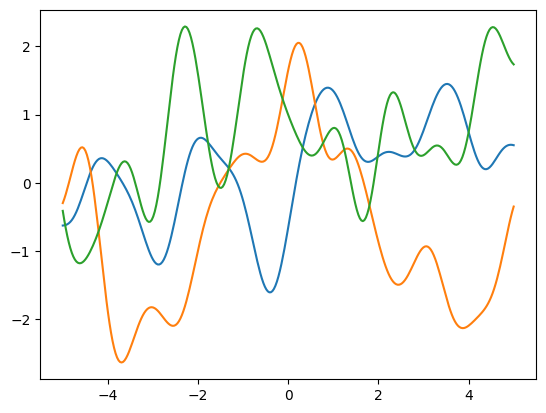

In [54]:
import numpy as np
import matplotlib.pyplot as plt

l = 0.5
k = lambda x, z : np.exp(-0.5*(x-z)**2/l**2)  # covariance function
K = lambda X, Z : np.array([[k(x,z) for x in X] for z in Z])  # create covariance matrix

x_plot = np.linspace(-5, 5, 300)

μ = np.zeros_like(x_plot)
Σ = K(x_plot, x_plot)

for i in range(3):
    y = np.random.multivariate_normal(μ, Σ)
    plt.plot(x_plot, y) # '-o')

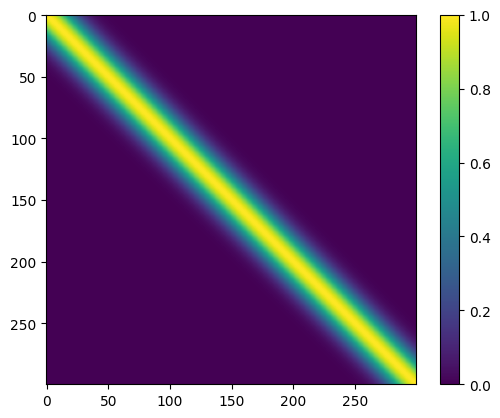

In [55]:
plt.imshow(Σ)
plt.colorbar()
plt.show()

In [58]:
def predict(x_train, y_train, x_test, σ):

    Σaa = K(x_train, x_train) + σ**2*np.eye(len(x_train))
    Σbb = K(x_test,  x_test)
    Σab = K(x_train, x_test)
        
    μ_pred = Σab @ np.linalg.solve(Σaa, y_train)
    Σ_pred = Σbb - Σab @ np.linalg.solve(Σaa, Σab.T)
    
    return μ_pred, Σ_pred

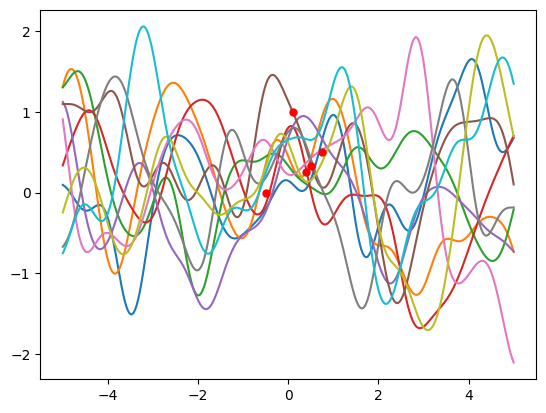

In [63]:
x_train = np.array([-0.5, .1,  .4,  0.5,  0.75])    # training inputs
y_train = np.array([  0,   1, .25,  .33,   0.5])    # training outputs

σ = 0.5
μ, Σ = predict(x_train, y_train, x_plot, σ) # mean and covariance of posterior GP

for i in range(10):
    y = np.random.multivariate_normal(μ, Σ)
    plt.plot(x_plot, y)
    
plt.plot(x_train, y_train, 'r.', markersize=10)
plt.show()

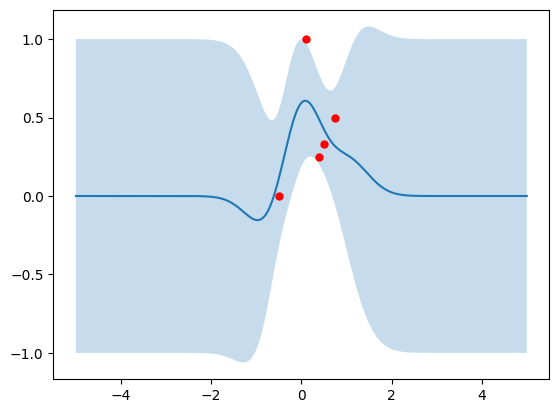

In [64]:
stds = np.sqrt(np.diag(Σ))
plt.plot(x_plot, μ)
plt.fill_between(x_plot, μ-stds, μ+stds, alpha=0.25)
plt.plot(x_train, y_train, 'r.', markersize=10)
plt.show()

In [ ]:
x_test = np.linspace(-2, 2, 20)
x = np.concatenate([x_train, x_test])
plt.imshow(K(x, x))
plt.colorbar()